<a href="https://colab.research.google.com/github/EmyAguirre02/cmp-5006-fall24-aproano/blob/Aguirre-MariaEmilia-HW3/final_homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Homework 3

**Name:** Elian García, María Emilia Aguirre & Juan Diego Luna

**Assignment Date:** December 3rd, 2024

**NRC:** 1444

**Responses or answers to the questions**

**Part 1: PicoCTF**

**PicoCTF Assignments**

**WebDecode**

First we started by using the browser’s inspect tool and searching the website’s code. Initially, the main homepage didn’t reveal the flag.

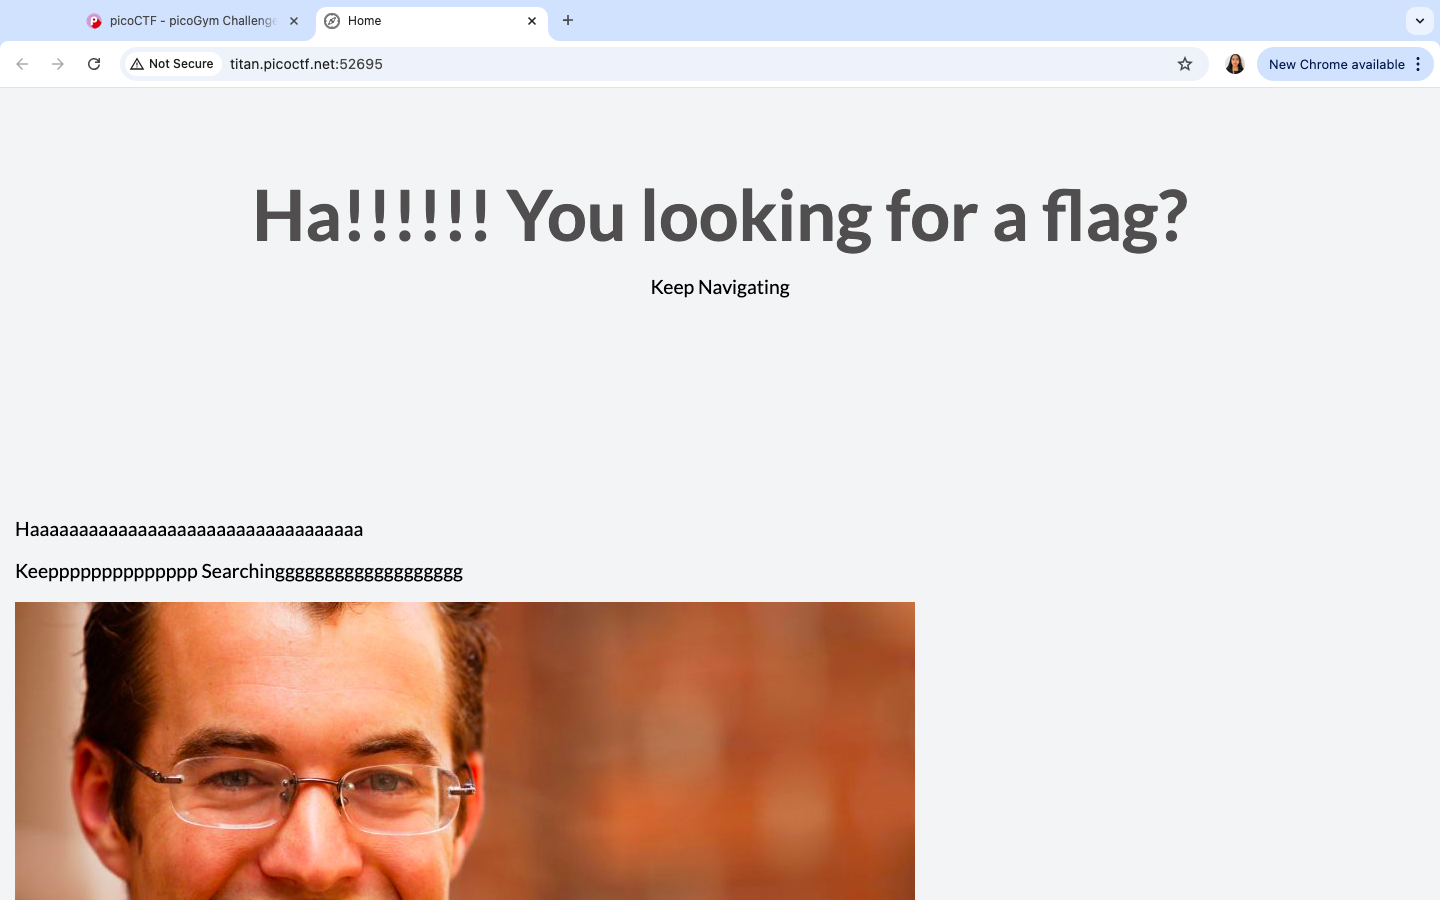

Noticing navigation links for "Home," "About," and "Contact," we decided to explore the "About" page. Here, a hint suggested that the flag could be found on this page. Although the search tool didn’t yield results, manually inspecting the code revealed an element. However, this only redirected back to the homepage.

Revisiting the "About" page, we found some unusual text within a section’s class, which seemed like a potential clue.


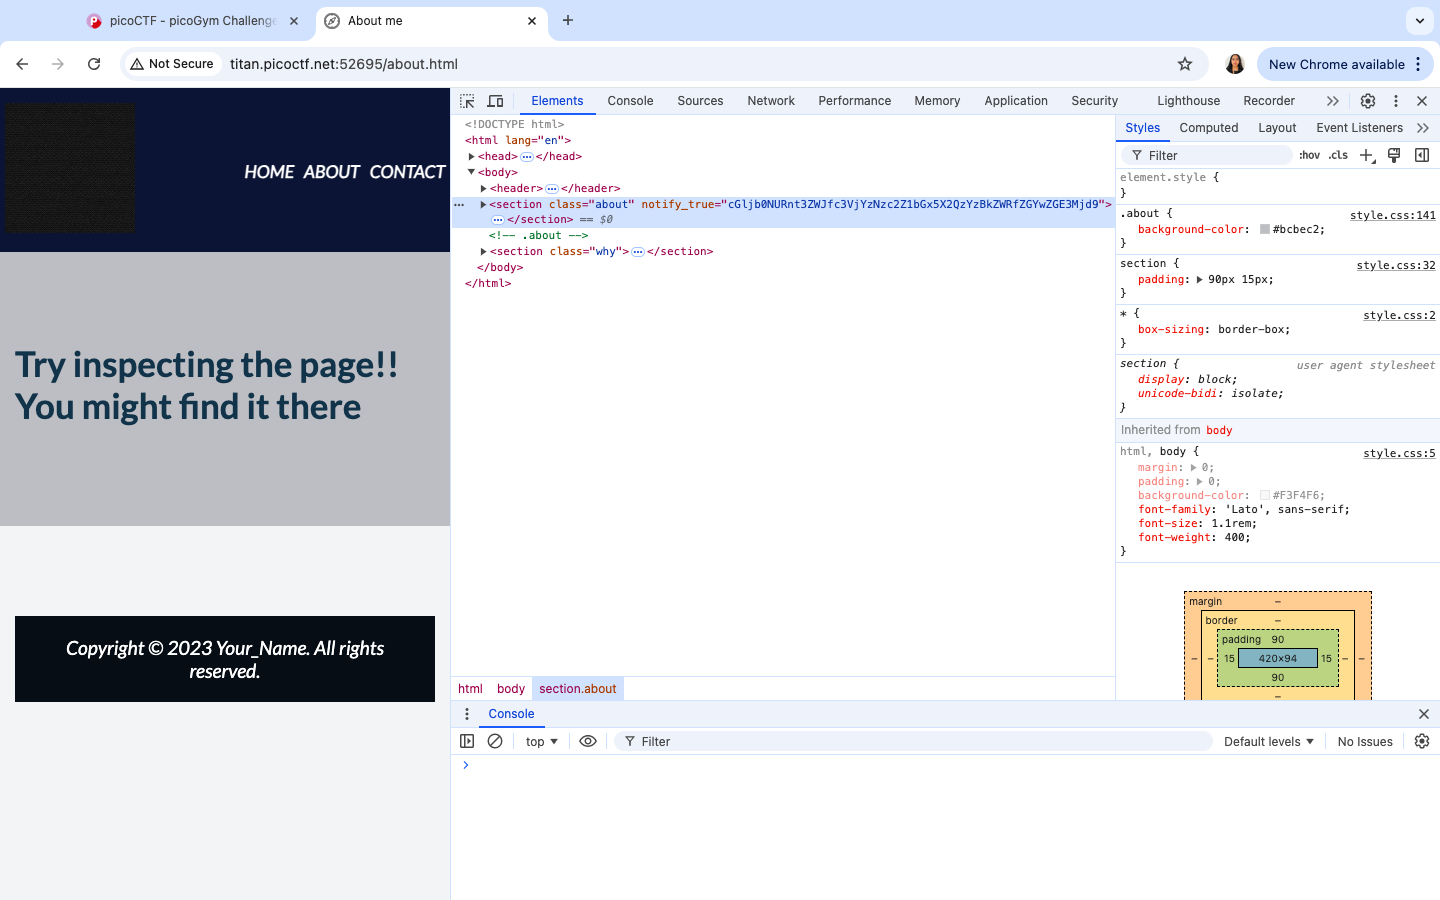

Referring to the hints provided for the challenge, we used CyberChef to decode the clue.
And this way, the flag was extracted.

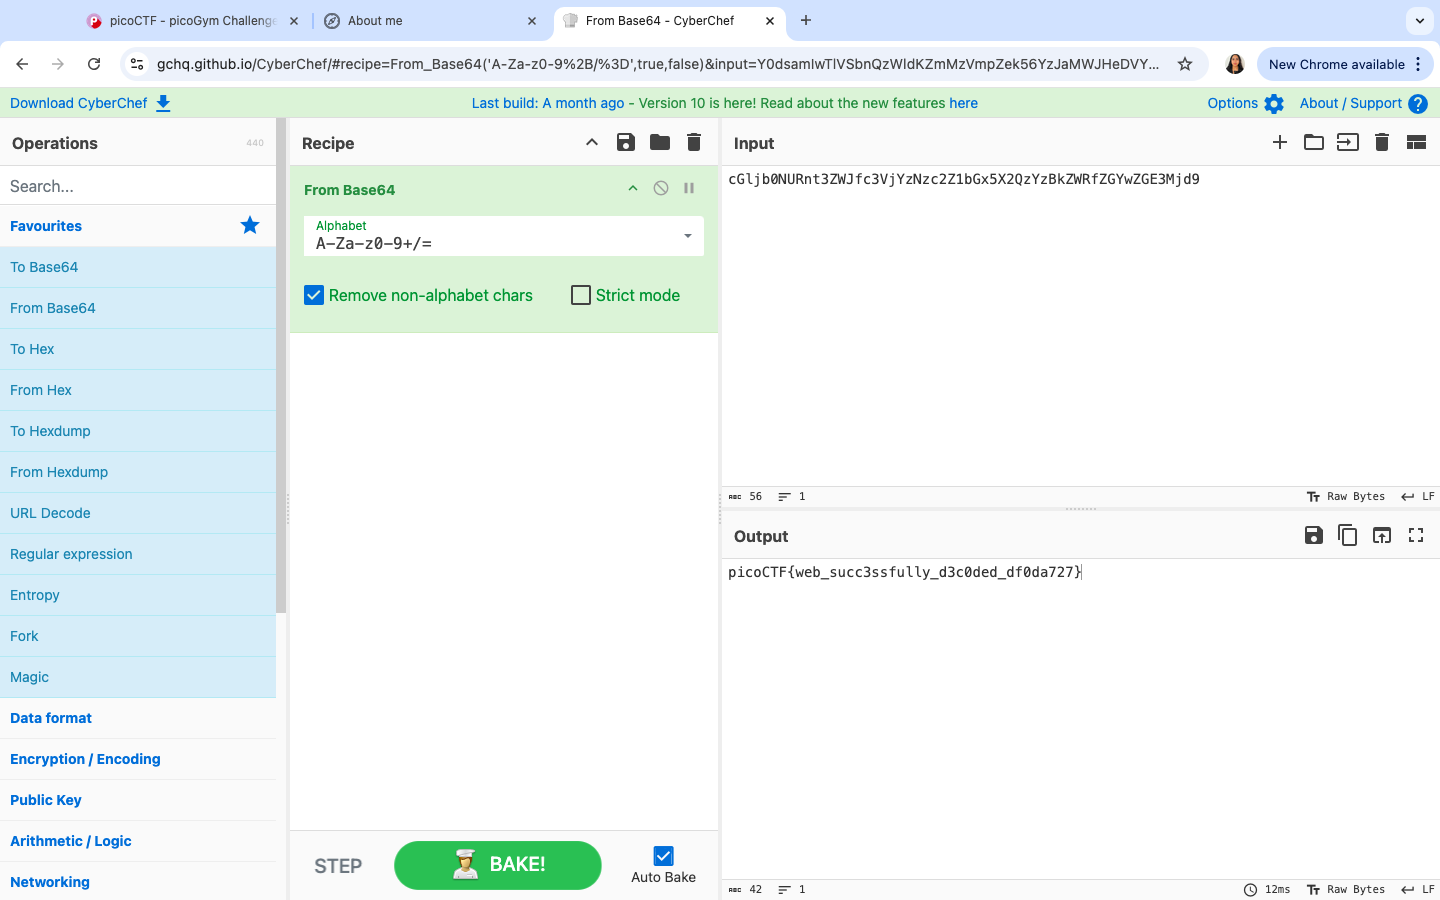

**Local Authority**

This challenge begins with a login page, which might suggest brute forcing or SQL injection, but the solution is simpler and requires inspection.

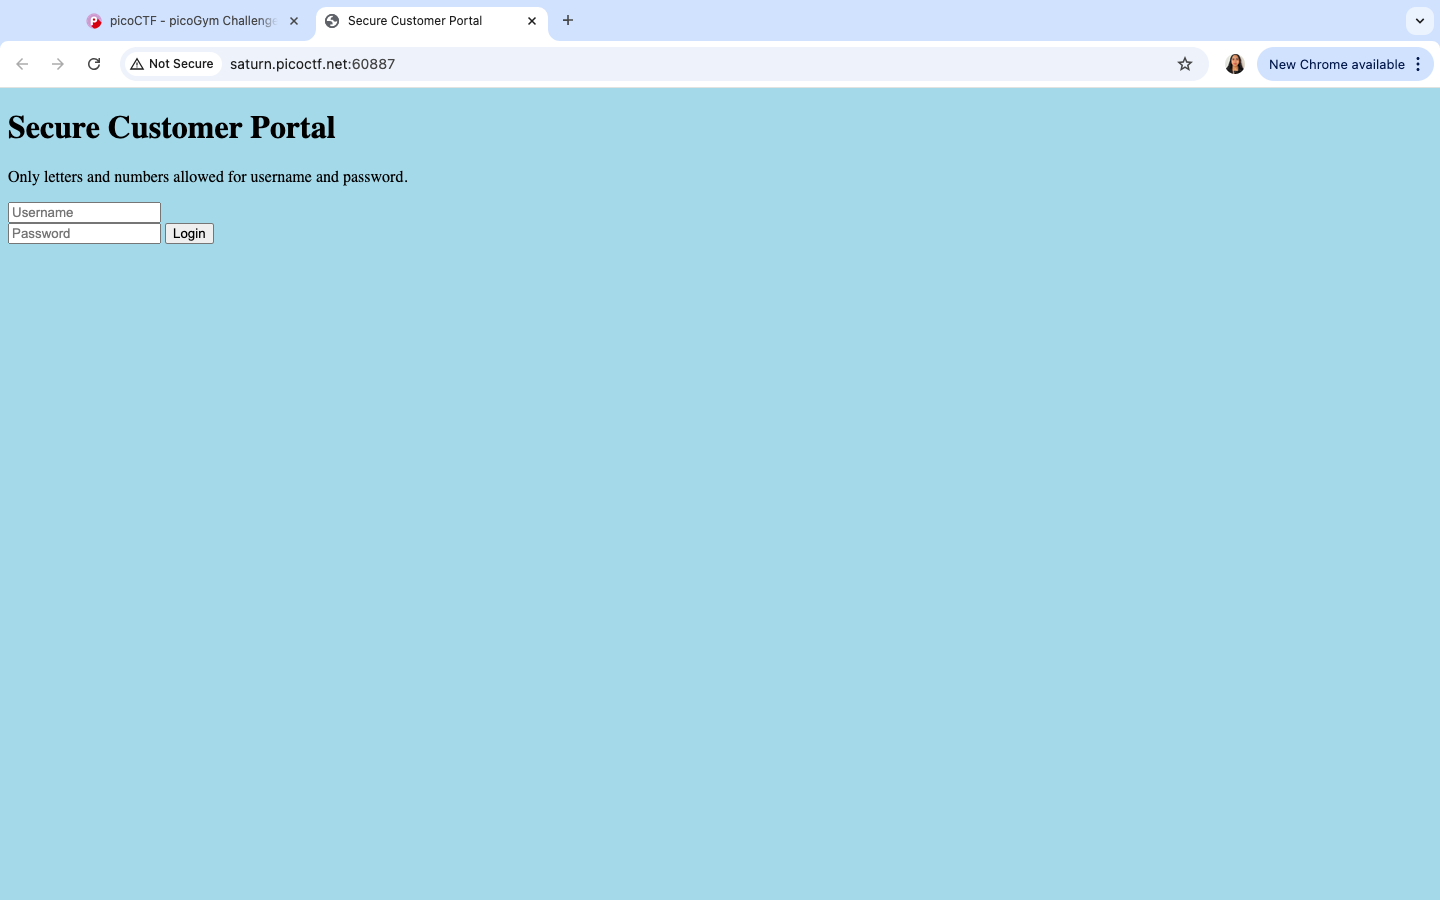

Initially, viewing the page source reveals nothing of interest. However, after submitting random credentials and checking the source again, an MD5 hash appears, associated with an admin account.  

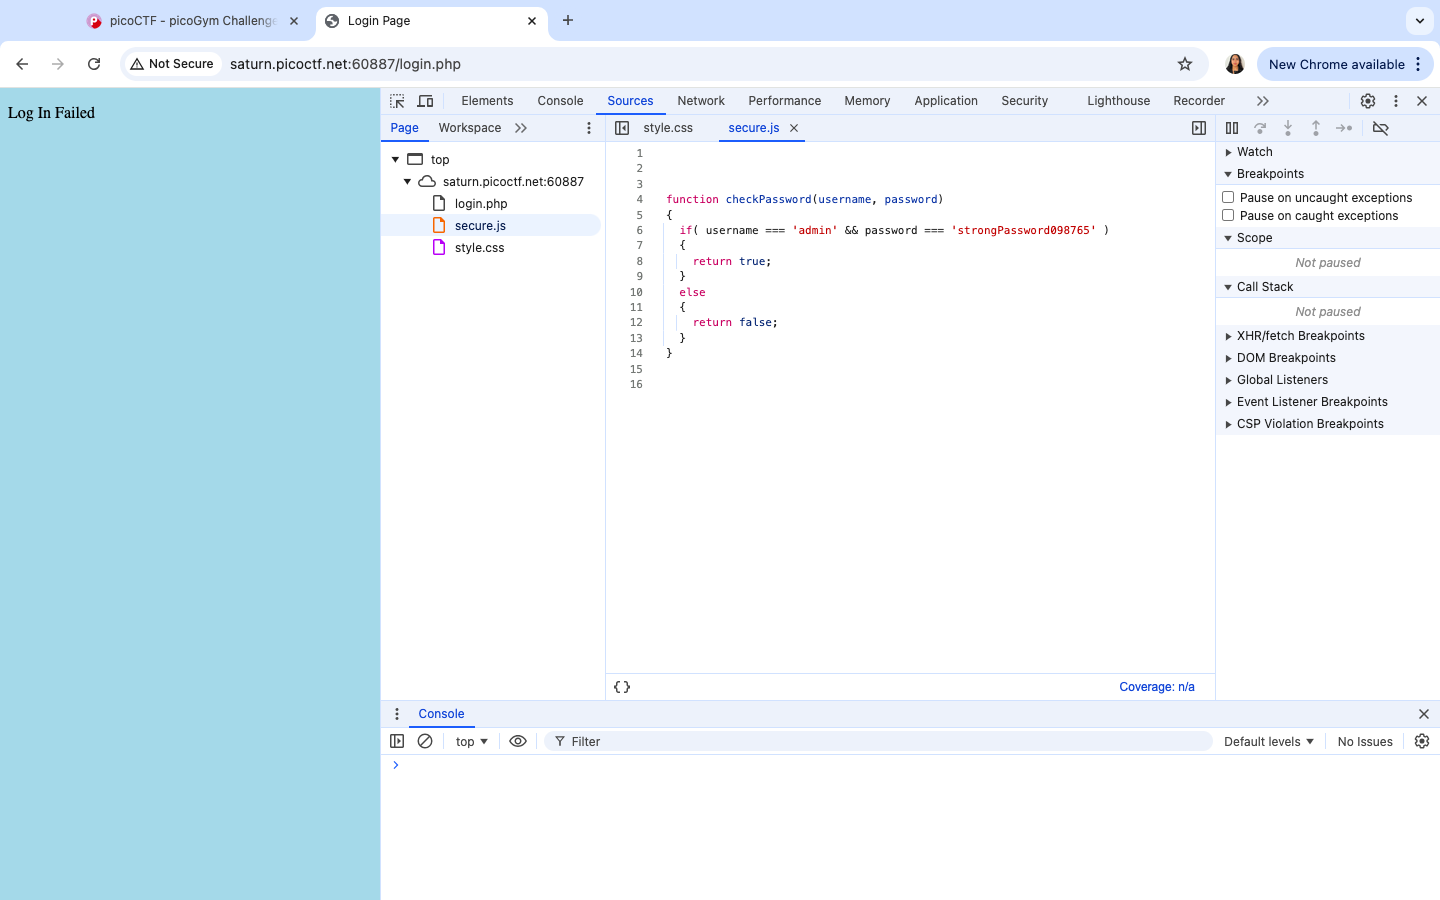

On reloading, a `secure.js` file appears, revealing admin credentials. Logging in with these credentials provides the flag.

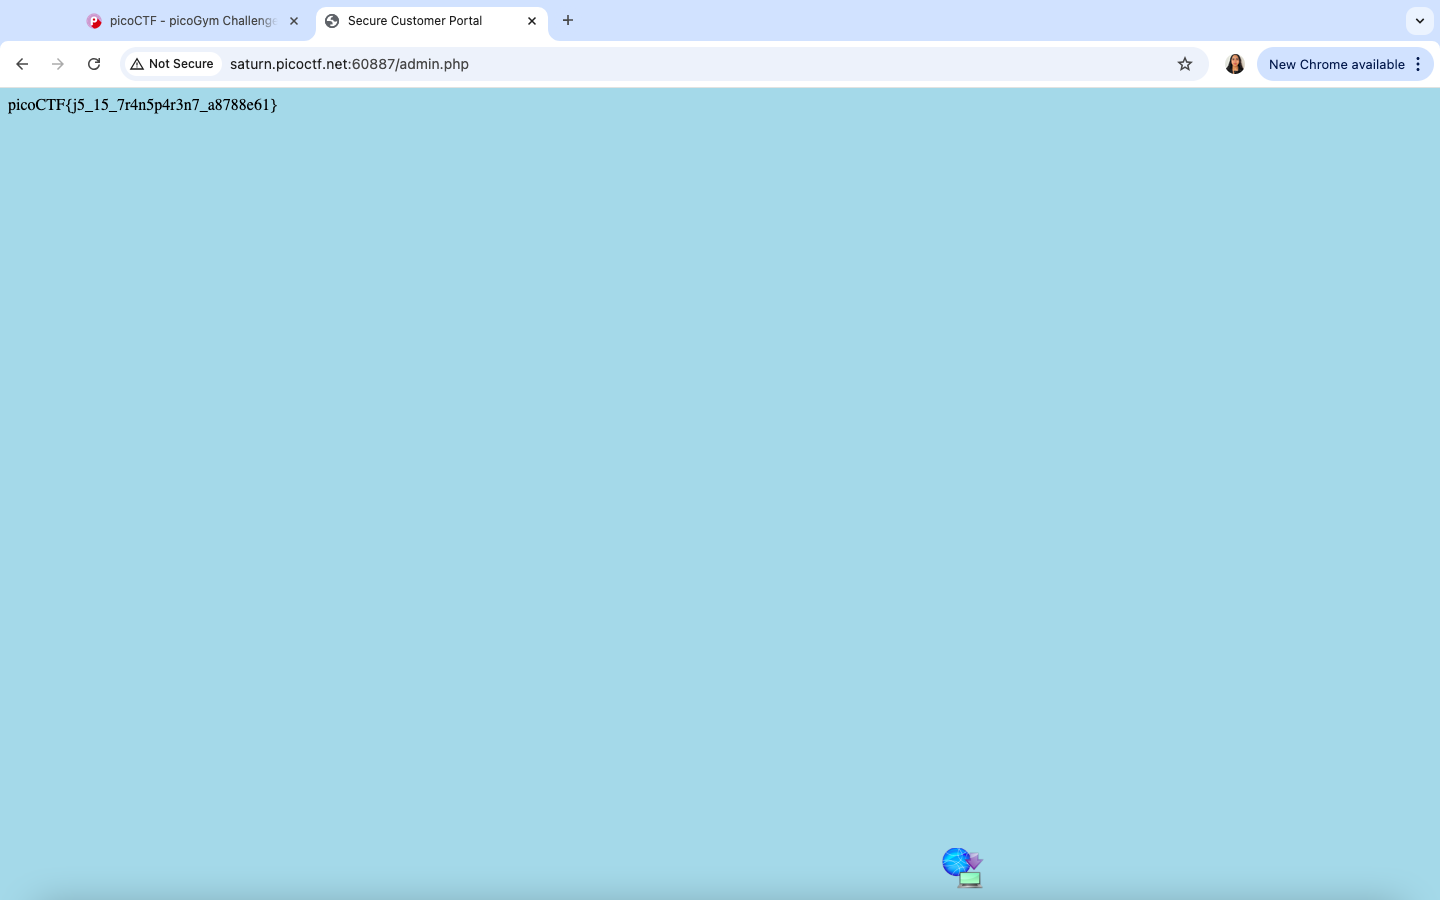

**More SQLi**

After starting the challenge, a login page is presented. Using random credentials reveals the structure of the login query, suggesting an opportunity for SQL injection. Entering the following:  
`'or 1=1;--`  
in the password field bypasses authentication. This works because the query effectively evaluates as true, granting access.

To identify the database type, the following query is used:  
`123' UNION SELECT 1, sqlite_version(), 3;--`,  
confirming the use of SQLite.

We can then retrieve a list of tables with:  
`123' UNION SELECT name, sql, null FROM sqlite_master;--`.  

Finally, the flag can be extracted using:  
`123' UNION SELECT flag, null, null FROM more_table;--`.

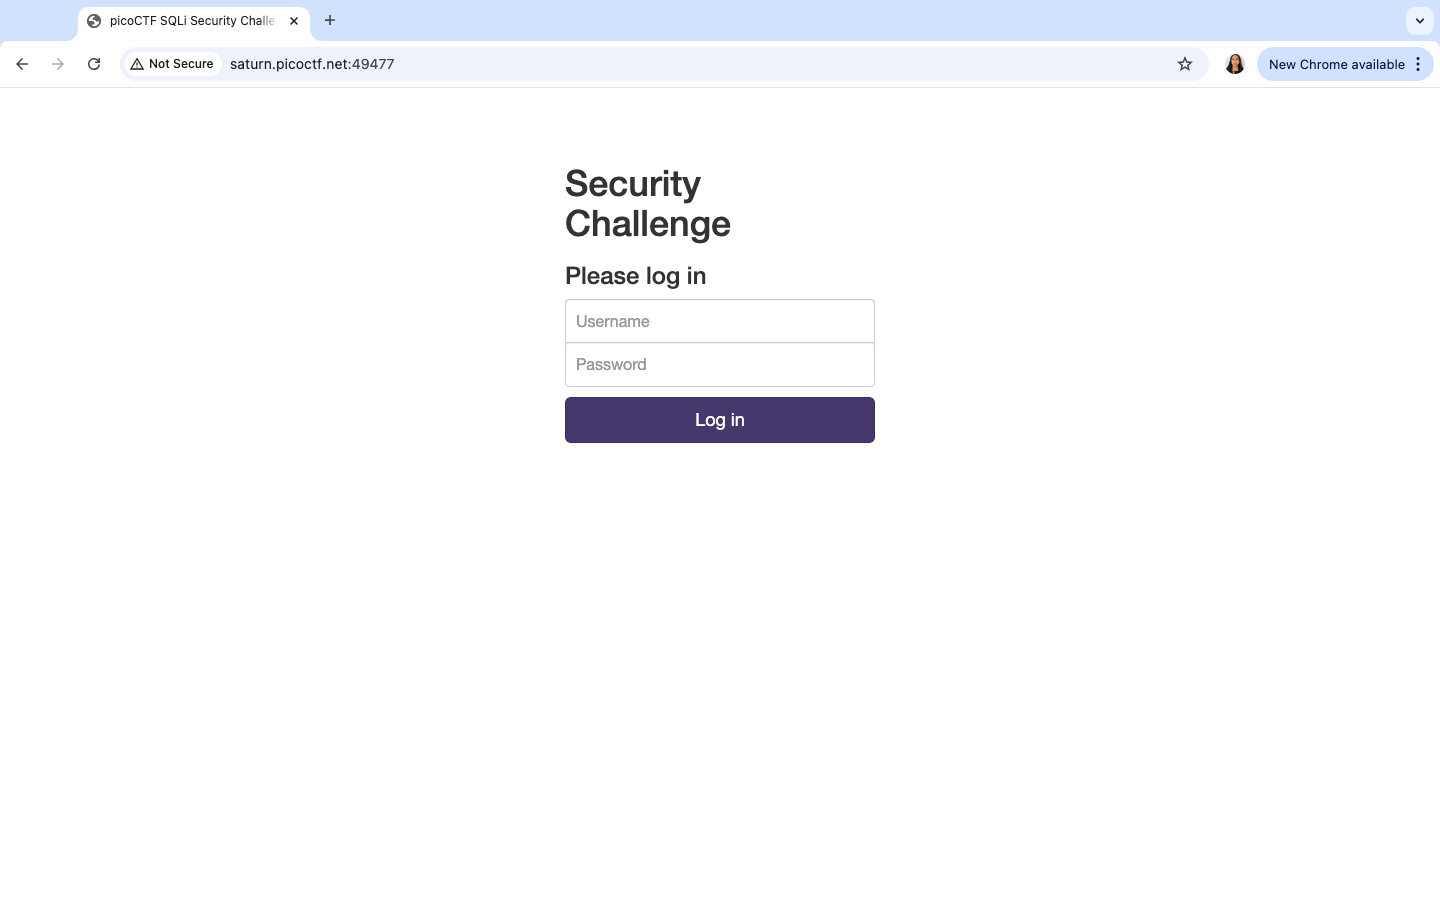

**Part 2: WAF**

Web application firewalls (WAFs) are a technology that helps protect web applications from common attacks.

- Deploy DVWA in a container, virtual machine, or a cloud provider
- Use a WAF, open source or cloud based, to protect this application
- Demonstrate that attack are not possible anymore against your application


We built 2 Kali Linux VMs. The first machine wuold be named "server" where our DVWA would be located, and then the other machine was the "attacker" machine where our DDos attack would be executed.


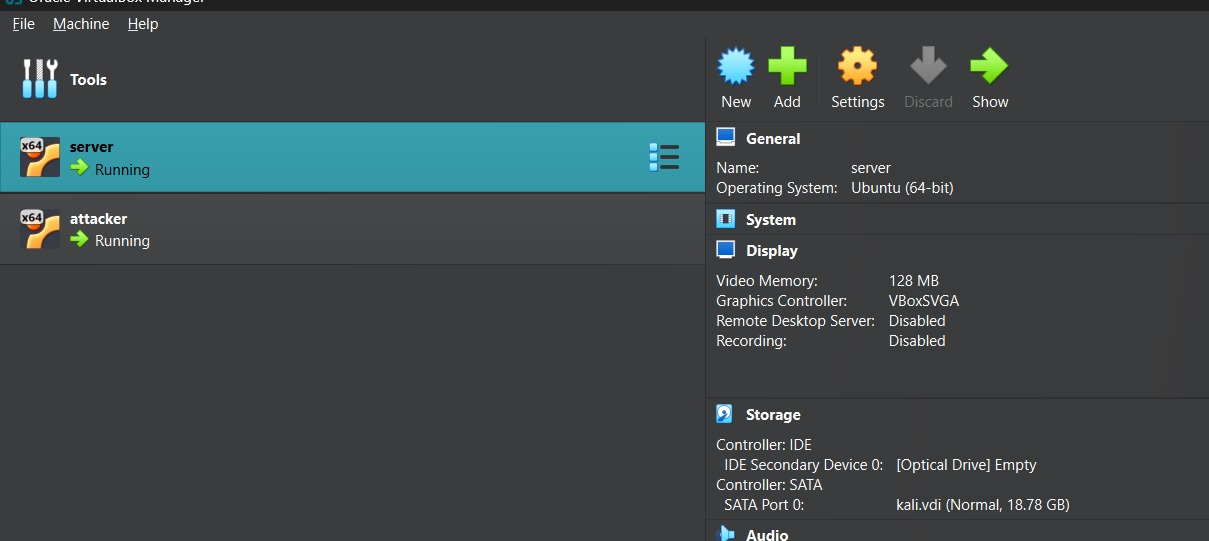

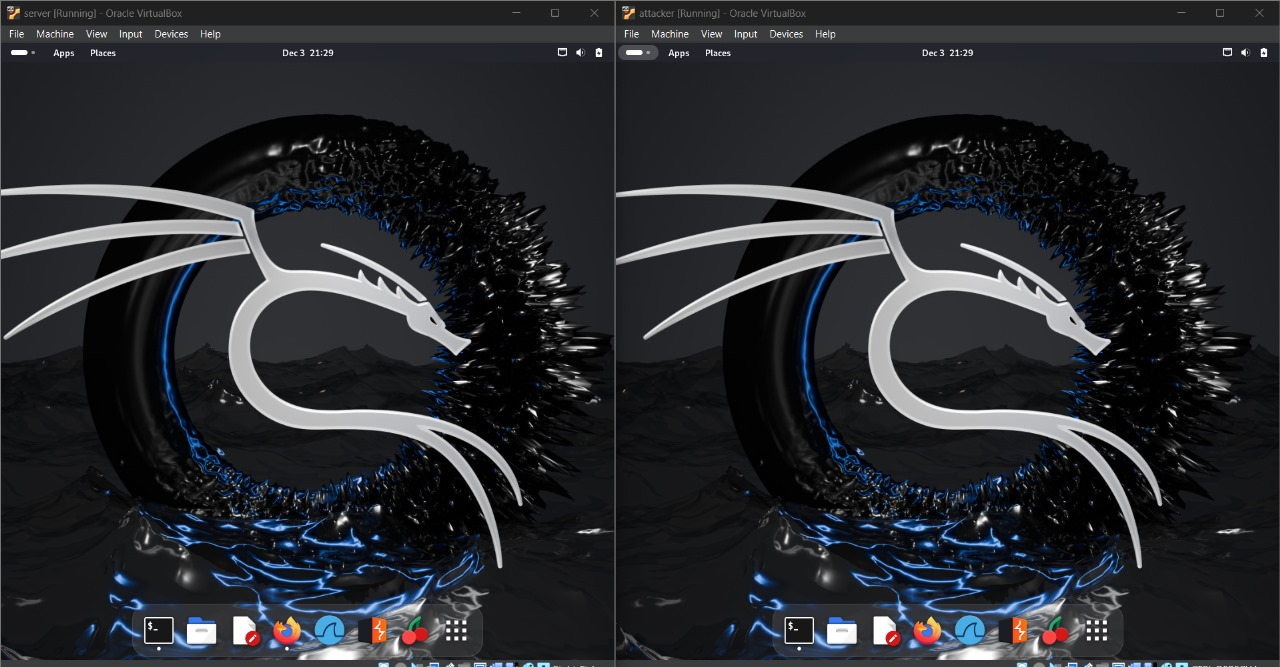

This is where we configure the Network and create a Nat Network for each of our virtual machines and add it to each one so we can allow communication between these two.

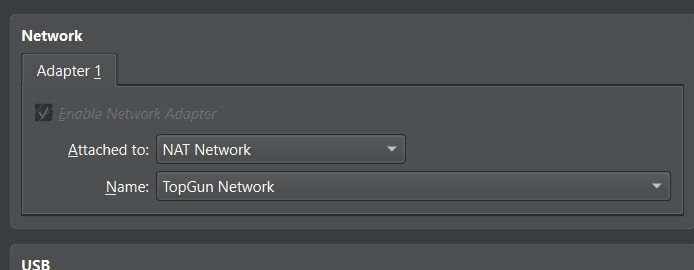

Ip address for the "attacker" virtual machine: 192.168.100.4

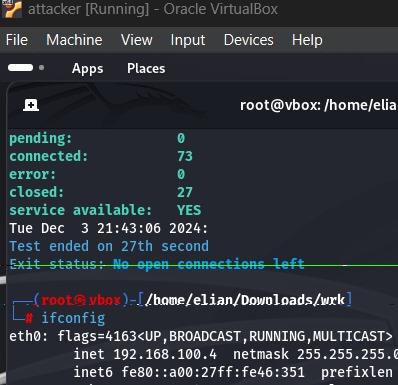

Ip address for the "attacker" virtual machine: 192.168.100.5

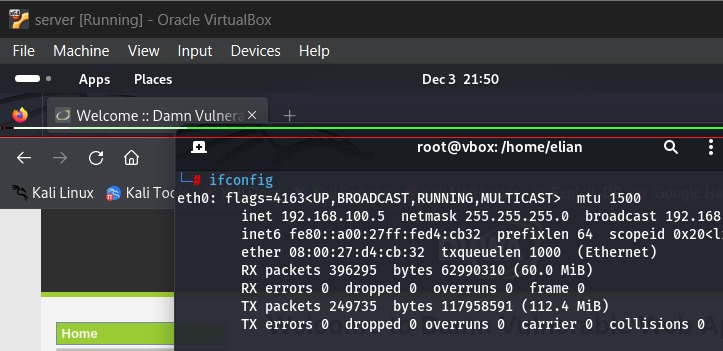

In our server machine we have Apache2 and mysql installed that allow our DVWA to run smoothly.

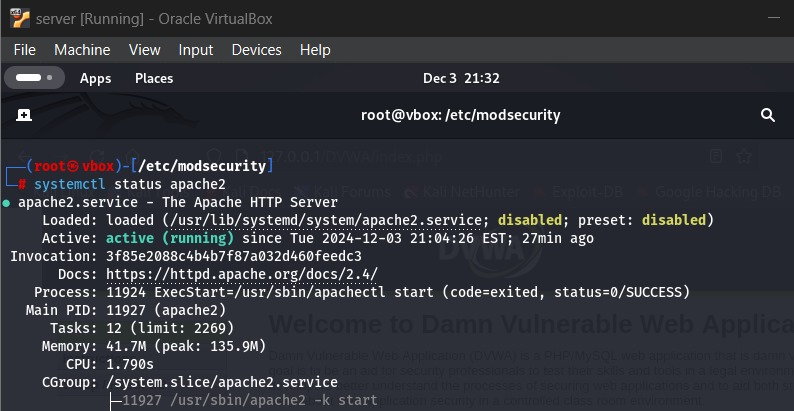

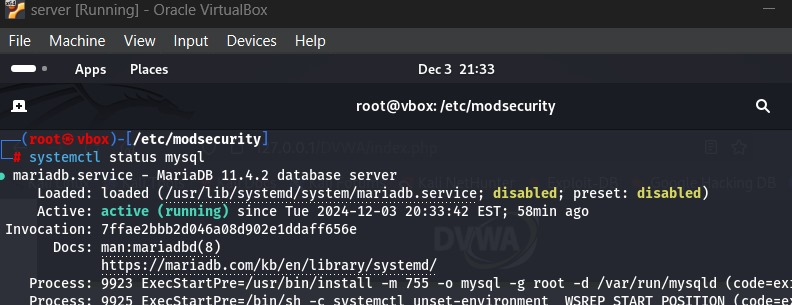

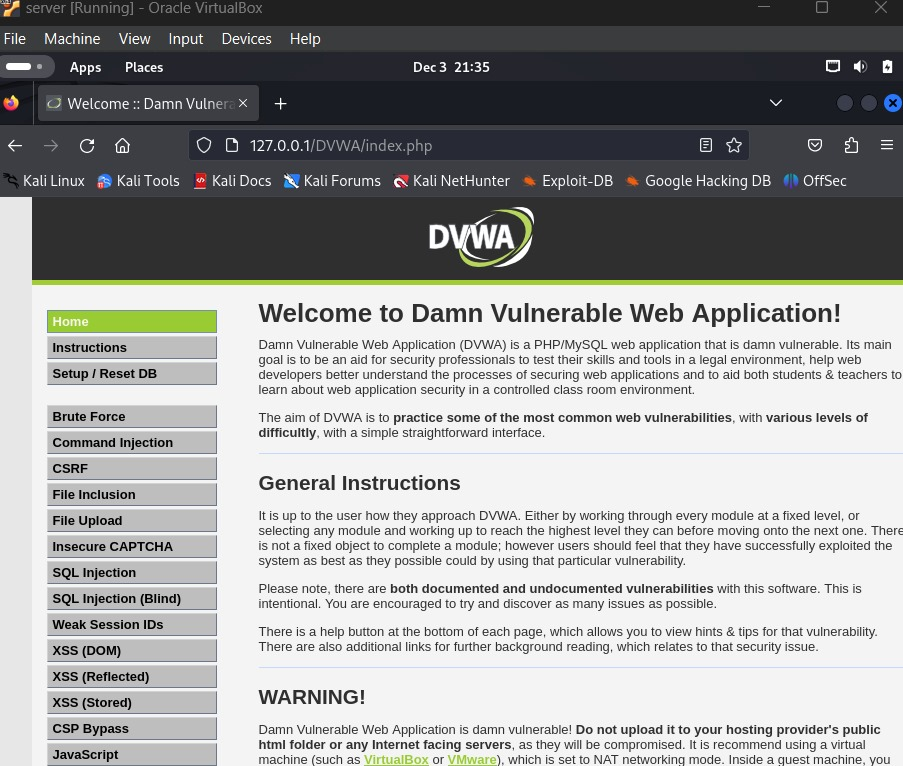

In our server we also utilize the pacakges modsecurity-crs and libapache2-mod-security2.

modsecurity-crs: This package contains the ModSecurity Core Rule Set (CRS), which is a set of generic rules designed to provide basic security protections for web applications. It helps detect and block common web vulnerabilities like SQL injection, cross-site scripting (XSS), and more.

libapache2-mod-security2: This is the ModSecurity module for Apache. It integrates with the Apache web server to provide web application firewall (WAF) functionality, enabling the server to monitor and filter HTTP traffic for security threats and anomalies.

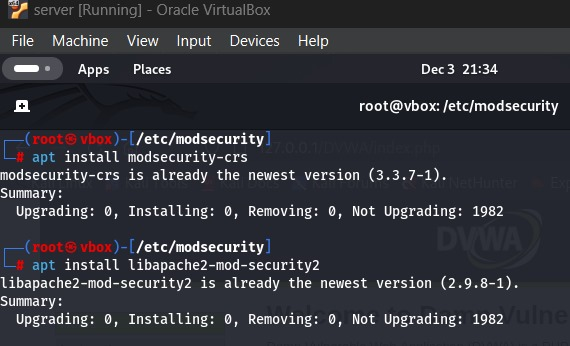

The slowhttptest package is a tool used for testing the resilience of web servers against slow HTTP attacks. These types of attacks involve sending partial HTTP requests at a very slow rate, which can exhaust server resources and cause service disruption. slowhttptest helps security teams and system administrators simulate such attacks to evaluate how well their server configurations handle such potential threats and identify any vulnerabilities in their system's performance under stress.

image.png

Now we will be applying the following command with the slowhttptest package:

slowhttptest -c 100 -B -i 10 -r 100 -t GET -u http:///192.168.100.5 -x 24 -p 2

This command allwows us to stimulate traffic into the "server" machine by simulating heavy traffic with a DDos attack.

We are also sending the command of

On the "server" console we will be applying the:

tail -f /var/log/apache2/modsec_audit.log

which will give us the log output for the interactions of external causes wiht our WAF , in this case the slowhttptest.

After we run the command and apply tests, we can see the different warnings that our WAF has generated.



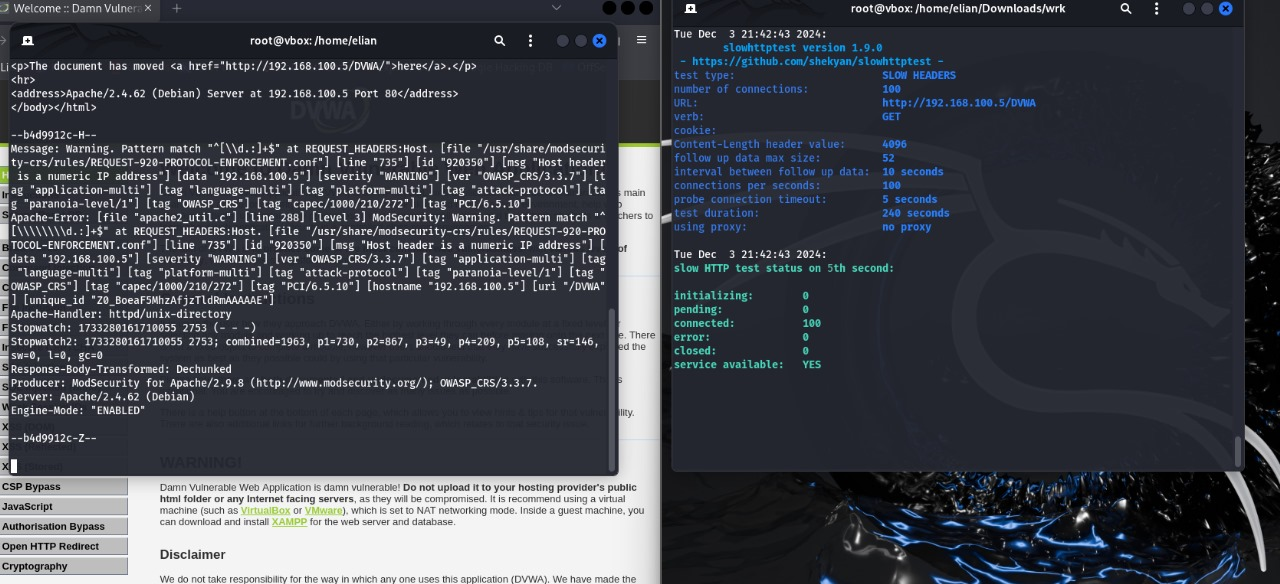

We ran the test for multiple times and as we can see the "service available" option is still "YES". This allows us to detect that our DVWA is still available and the malicious attack si being deffended.

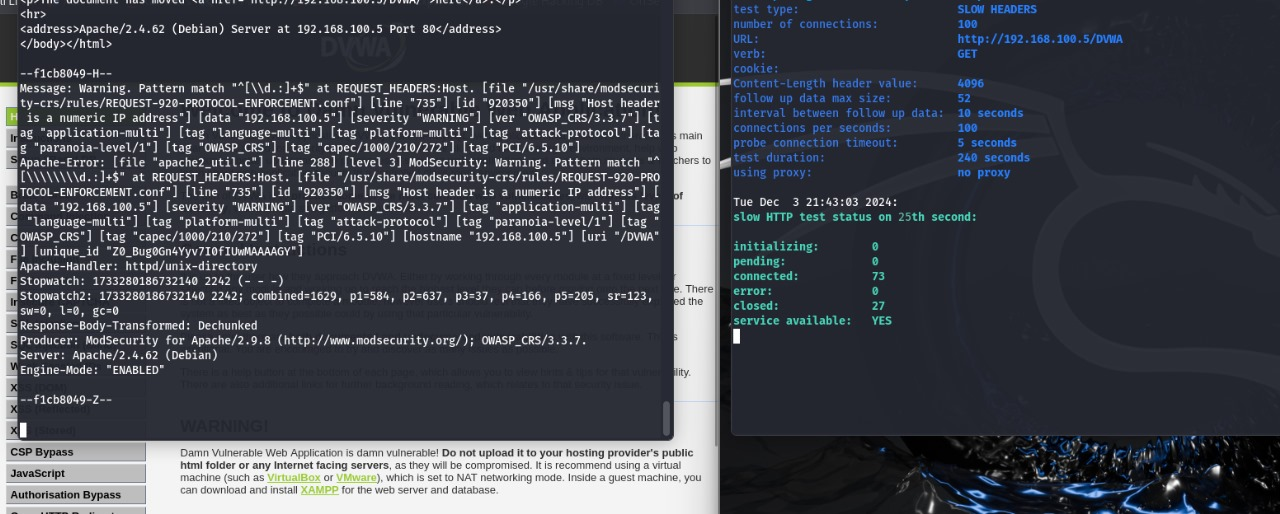

We are also running the command:

 curl -H "User-Agent: '; DROP TABLE users; --" http://192.168.100.5/DVWA

 This allows us to inject SQL commands which makes the following  [ID:920350] pop up, which is a SQL Injection vulnerability check and it looks for patterns in requests that resemble SQL injection attempts and handles its attack







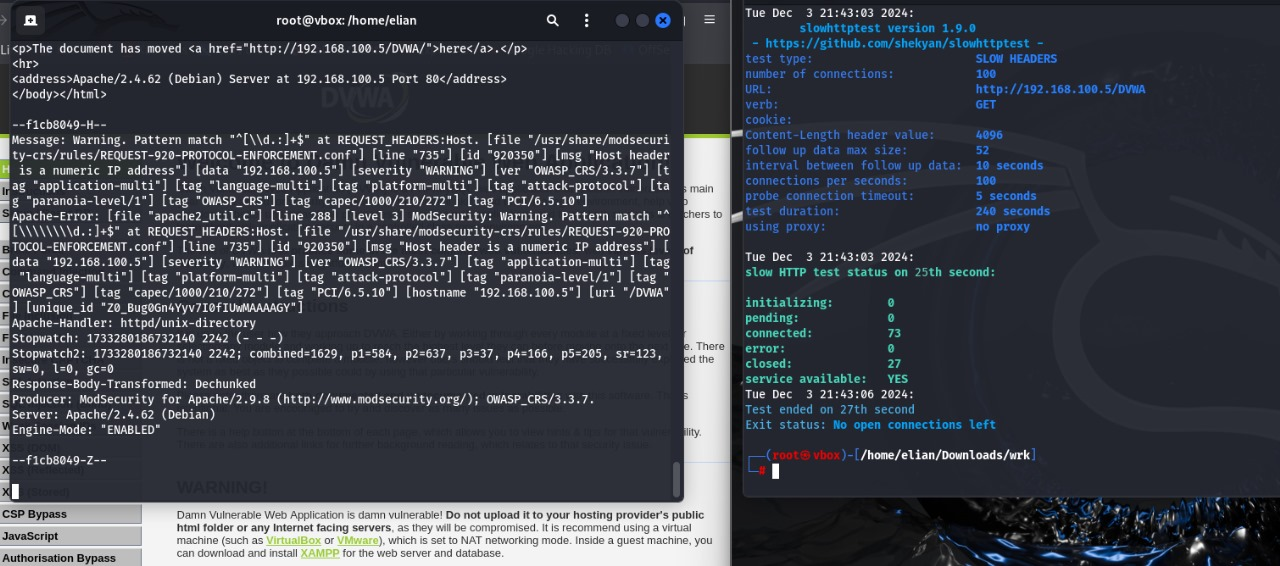